## Scikit-Learn course

https://inria.github.io/scikit-learn-mooc/overfit/overfit_module_intro.html

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data
from sklearn.datasets import fetch_california_housing

# pre-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_selector as selector, ColumnTransformer

# pipeline - model selection, metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, learning_curve, validation_curve, ShuffleSplit,train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier

## Predictive Pipeline

Goals - Play with a basic processing / fit / predict pipeline on heterogeneous tabular data

In [3]:
adult_census = pd.read_csv("../data/adult_census.csv")

In [4]:
adult_census.head(3)

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [19]:
X = adult_census.drop(columns="class")
y = adult_census["class"]

### Preprocessing

In [21]:
# defining column types
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

# applying separate processing
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

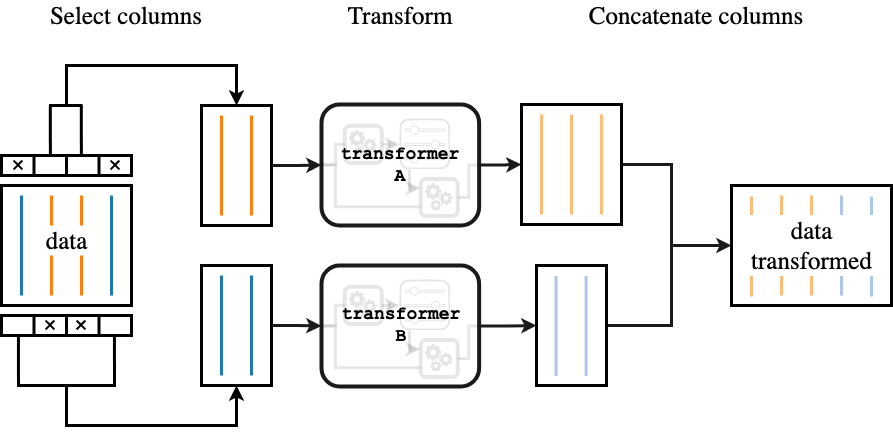

### Fitting and Evaluation

In [22]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

In [23]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['id', 'age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [24]:
cv_results = cross_validate(model, X, y, cv=5)
cv_results

{'fit_time': array([1.01834226, 0.86717534, 0.79164124, 0.810817  , 0.75997901]),
 'score_time': array([0.03099489, 0.0294888 , 0.02806282, 0.0390439 , 0.0321641 ]),
 'test_score': array([0.85146893, 0.85044529, 0.84930385, 0.8527846 , 0.85647011])}

In [32]:
model = LogisticRegression()
model.fit(X, y)
model.score(X, y)

ValueError: could not convert string to float: 'Private'

In [25]:
cv_results["test_score"].mean(), cv_results["test_score"].std()

(0.8520945554009328, 0.0024706738548830884)

**Ensemble model**

In [29]:
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())

In [30]:
cv_results = cross_validate(model, X, y, cv=5)
cv_results

{'fit_time': array([0.85348988, 0.74407601, 0.94852805, 0.98326516, 0.67939091]),
 'score_time': array([0.05292702, 0.04531932, 0.04526806, 0.05619001, 0.05180693]),
 'test_score': array([0.83120074, 0.87183949, 0.871724  , 0.87387387, 0.81111794])}

In [31]:
cv_results["test_score"].mean(), cv_results["test_score"].std()

(0.8519512072025123, 0.025942430273477594)

## Selecting best model

Goals - 

In [92]:

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target*=100

In [93]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [18]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(data, target)

DecisionTreeRegressor(random_state=0)

In [23]:
target_predicted = regressor.predict(data)
MAE = mean_absolute_error(target, target_predicted)
MAPE = mean_absolute_percentage_error(target, target_predicted)
SSE = mean_squared_error(target, target_predicted)

print(round(MAE,2), round(MAPE,2), round(SSE,2))

In [25]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

In [26]:
regressor.fit(data_train, target_train)

DecisionTreeRegressor(random_state=0)

In [94]:
target_predicted = regressor.predict(data_train)
MAE = mean_absolute_error(target_train, target_predicted)
MAPE = mean_absolute_percentage_error(target_train, target_predicted)
SSE = mean_squared_error(target_train, target_predicted)

print(round(MAE,2), round(MAPE,2), round(SSE,2))

0.0 0.0 0.0


In [29]:
target_predicted = regressor.predict(data_test)
MAE = mean_absolute_error(target_test, target_predicted)
MAPE = mean_absolute_percentage_error(target_test, target_predicted)
SSE = mean_squared_error(target_test, target_predicted)

print(round(MAE,2), round(MAPE,2), round(SSE,2))

47.28 0.27 5496.09


In [58]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=40, test_size=0.3, random_state=0)
cv_results = cross_validate(
    regressor, data, target, cv=cv, scoring=["neg_mean_absolute_percentage_error", 
                                             "neg_mean_absolute_error"]) # to get a score on MAE

In [59]:
cv_results = pd.DataFrame(cv_results)
cv_results.head()

,fit_time,score_time,test_neg_mean_absolute_percentage_error,test_neg_mean_absolute_error
0,0.118480,0.002774,-0.255565,-46.909797
1,0.106630,0.002922,-0.255213,-46.421170
2,0.105255,0.002757,-0.261298,-47.411089
3,0.095441,0.002774,-0.238930,-44.319824
4,0.098294,0.002957,-0.255124,-47.607875


In [52]:
cv_results["test_error"] = -cv_results["test_score"]

<AxesSubplot:ylabel='Frequency'>

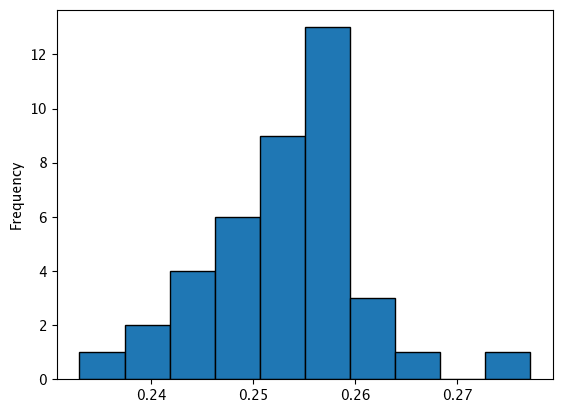

In [53]:
cv_results["test_error"].plot.hist(bins=10, edgecolor="black")

In [54]:
cv_results["test_error"].describe()

count    40.000000
mean      0.252582
std       0.007687
min       0.232927
25%       0.247439
50%       0.253398
75%       0.256496
max       0.277201
Name: test_error, dtype: float64

In [55]:
target.describe()

count    20640.000000
mean       206.855817
std        115.395616
min         14.999000
25%        119.600000
50%        179.700000
75%        264.725000
max        500.001000
Name: MedHouseVal, dtype: float64

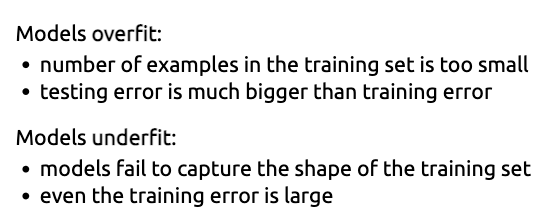

In [60]:
# looking at training score
cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(regressor, data, target,
                            cv=cv, scoring="neg_mean_absolute_error",
                            return_train_score=True, n_jobs=2)
cv_results = pd.DataFrame(cv_results)

In [61]:
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]]

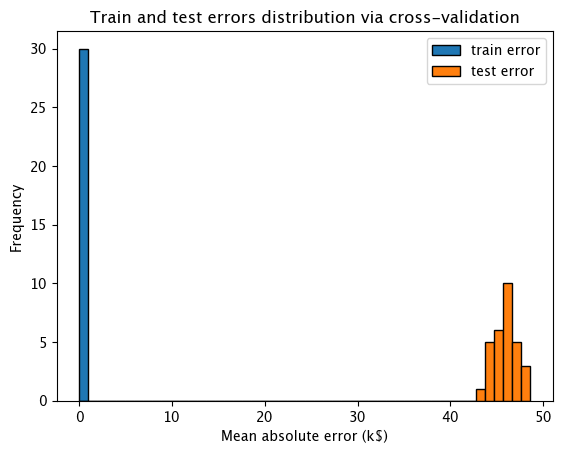

In [63]:
scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Train and test errors distribution via cross-validation")

**Complexity estimation - validation curve (hyper-parameter tuning)**

In [96]:
max_depth = [1, 5, 10, 15, 20, 25]
train_scores, test_scores = validation_curve(
    regressor, data, target, param_name="max_depth", param_range=max_depth,
    cv=cv, scoring="neg_mean_absolute_error", n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores


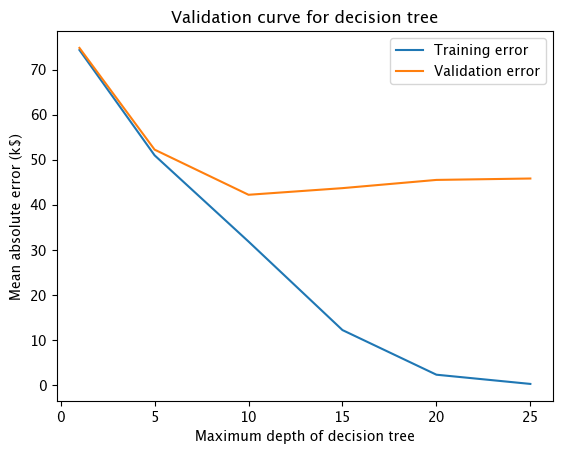

In [97]:
# mean estimates
plt.plot(max_depth, train_errors.mean(axis=1), label="Training error")
plt.plot(max_depth, test_errors.mean(axis=1), label="Validation error")
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")

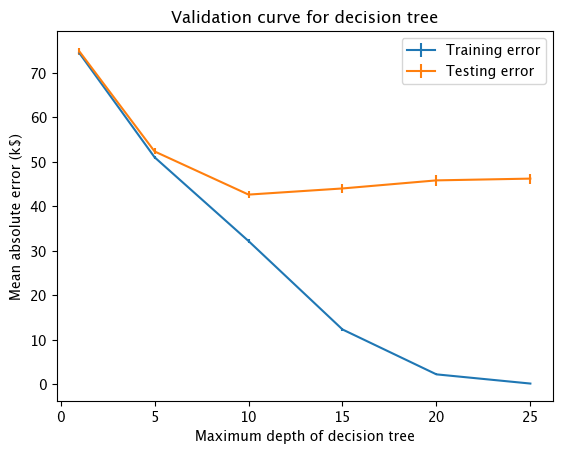

In [77]:
# std for variance
plt.errorbar(max_depth, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label='Training error')
plt.errorbar(max_depth, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label='Validation error')
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")

**Number of data points - Learning Curve**

In [70]:

train_sizes = np.linspace(0.1, 1.0, num=5, endpoint=True)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [71]:

cv = ShuffleSplit(n_splits=30, test_size=0.2)

In [98]:
results = learning_curve(
    regressor, data, target, train_sizes=train_sizes, cv=cv,
    scoring="neg_mean_absolute_error", n_jobs=2)
train_size, train_scores, test_scores = results[:3]
# Convert the scores into errors
train_errors, test_errors = -train_scores, -test_scores

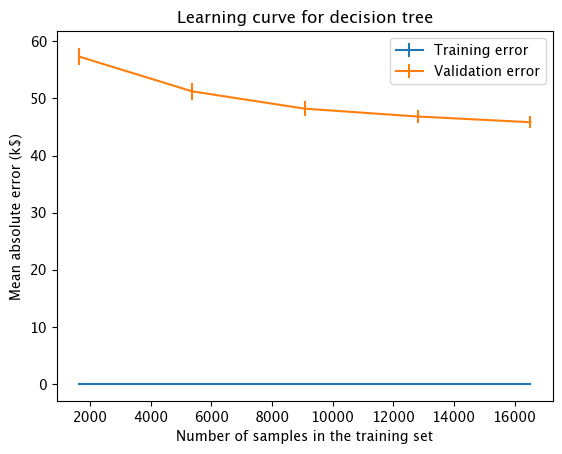

In [99]:
plt.errorbar(train_size, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label="Training error")
plt.errorbar(train_size, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label="Validation error")
plt.legend()

plt.xlabel("Number of samples in the training set")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Learning curve for decision tree")

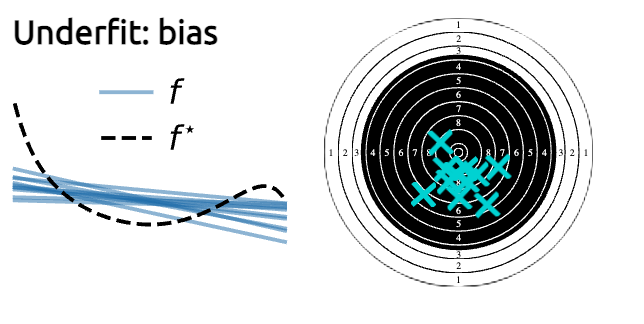
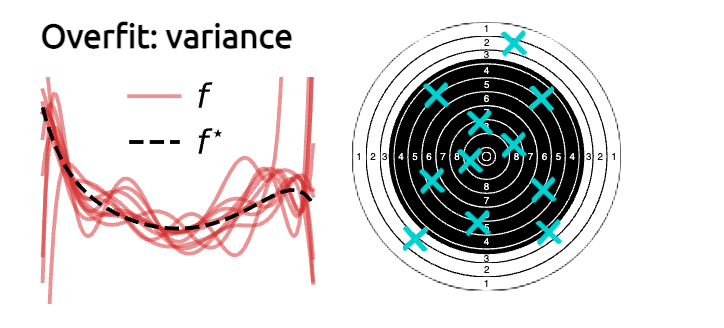
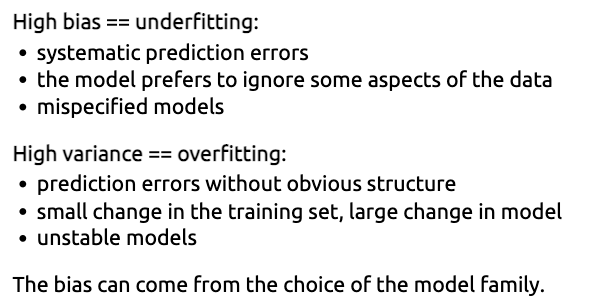

## Tuning Hyperparameters

Goals - 

hyperparameters refer to the parameter that will control the learning process.

Hyper-parameter: model dependent + value is dataset-dependent

### Manual tuning

In [87]:
adult_census = pd.read_csv("../data/adult_census.csv")

target_name = "class"
numerical_columns = [
    "age", "capital-gain", "capital-loss", "hours-per-week"]

target = adult_census[target_name]
data = adult_census[numerical_columns]

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ("preprocessor", StandardScaler()),
    ("classifier", LogisticRegression())
])

In [89]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target)
scores = cv_results["test_score"]
print(f"Accuracy score via cross-validation:\n"
      f"{scores.mean():.3f} ± {scores.std():.3f}")

Accuracy score via cross-validation:
0.800 ± 0.003


In [90]:
model.set_params(classifier__C=1e-3)
cv_results = cross_validate(model, data, target)
scores = cv_results["test_score"]
print(f"Accuracy score via cross-validation:\n"
      f"{scores.mean():.3f} ± {scores.std():.3f}")

Accuracy score via cross-validation:
0.787 ± 0.002


### Automated tuning

## Linear Models

Goals - 

## Decision Tree Models

Goals - 

## Ensemble

Goals - 

## Evaluating Model Performance

Goals - 